<a href="https://colab.research.google.com/github/DaniyalK03/PML/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning for Physicists
## Coursework C -- Part 1


### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to Moodle. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


# Coursework C - Part 1 Introduction

**Submission by SN: 21015796**

The following notebook is submitted coursework C for PHAS0056.

This notebook compares maximum accuracy for a neural network with a single convolutional layer and multiple single convolutional layer when tested across the MNIST handwritten digits.

Findings below imply that adding convolutional layers slightly improves accuracy at the cost of computational efficiency.

The following code is adapted and structured similar to [1].

*Bibliography*

[1] R. Nichol, "Week4_ConvolutionalNeuralNetwork.ipynb", UCL, PHAS:0056, 2024

In [ ]:
###############################################################################

# Importing necessary backend modules and libraries
# Same backend from [1]

import matplotlib.pyplot as plt
import numpy as np
import math

# Importing TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Setting up for later plotting
import matplotlib.style
import matplotlib as mpl
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=100 # Provides appropriate size for plots

In [ ]:
# Unloading MNIST image dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

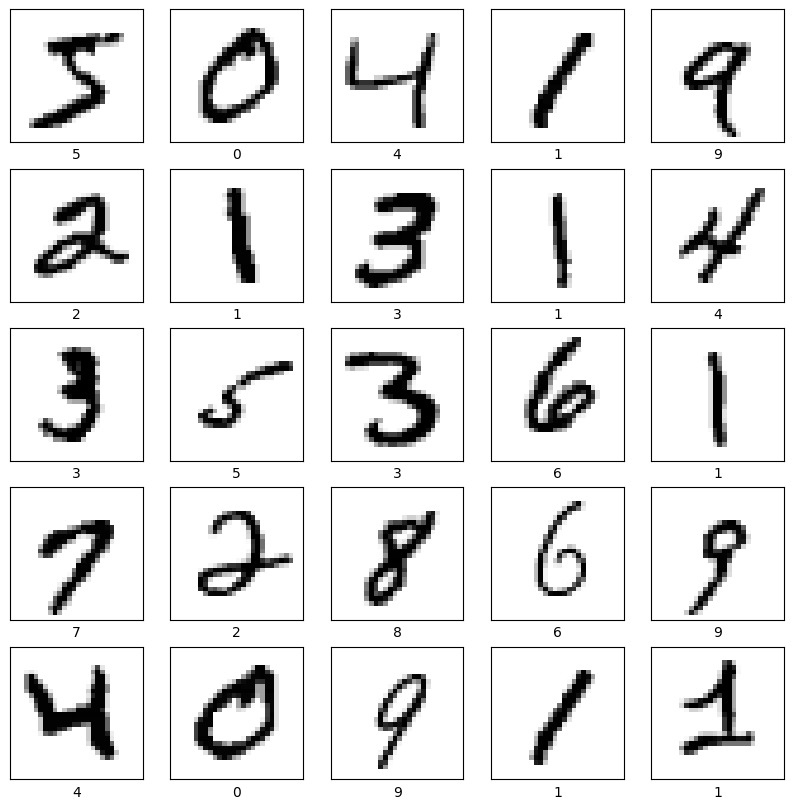

In [ ]:
# Example of image dataset and associated labels [1]
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))

# Grid of 25 images arranged in a 5x5 grid
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Task 1

In [ ]:
# Setting up a neural network with a single convolutional layer [1]
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(27, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 27 kernals, each 3x3 for the single convolutional layer with input of a layer of 28x28 pixels
model.add(keras.layers.MaxPooling2D((2, 2))) # Pooling data using a 2x2 matrix and taking the maximum value to make data more manageable

model.add(keras.layers.Flatten()) # Flattening the arrays processed thus far
model.add(keras.layers.Dense(64, activation='relu')) # Regular dense layer of 64 neurons
model.add(keras.layers.Dense(10)) # 10 output neurons corresponding to the digit labels
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 27)        270       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 27)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4563)              0         
                                                                 
 dense (Dense)               (None, 64)                292096    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 293016 (1.12 MB)
Trainable params: 293016 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# Compiling model using adam for optimum accuracy and computing efficiency [1]
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Training model on the train images and comparing to validation data [1]
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1705 - accuracy: 0.9495 - val_loss: 0.0668 - val_accuracy: 0.9786
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0600 - accuracy: 0.9822 - val_loss: 0.0495 - val_accuracy: 0.9834
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0470 - val_accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0451 - val_accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0463 - val_accuracy: 0.9847


5 epochs used here as a very high accuracy is reached quickly and this is sufficient to show differences with the multi convolutional layer neural network.

313/313 - 2s - loss: 0.0463 - accuracy: 0.9847 - 2s/epoch - 5ms/step


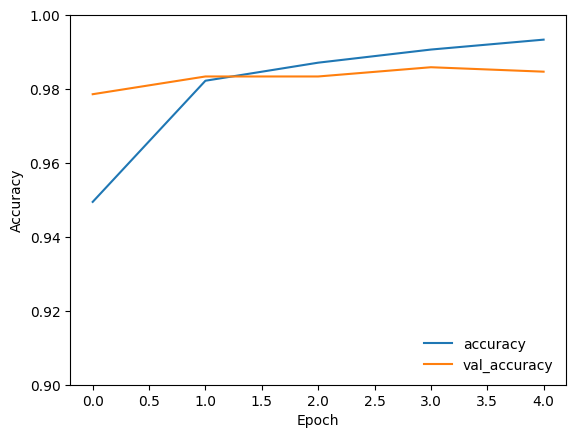

In [ ]:
# Plotting accuracy and validation accuracy to determine efficacy of single convolutional layer neural network [1]
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.90, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

The divergence at the later epochs signifies a slight overfitting though a high accuracy has been reached.

## Task 2

In [ ]:
# Setting up a neural network with multiple convolutional layers [1]
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(27, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 27 kernals, each 3x3 for the first convolutional layer with input of a layer of 28x28 pixels
model2.add(keras.layers.MaxPooling2D((2, 2))) # Pooling data using a 2x2 matrix and taking the maximum value to make data more manageable
model2.add(keras.layers.Conv2D(27, (3, 3), activation='relu')) # 27 kernals, each 3x3 for the second convolutional layer with input of a layer of 28x28 pixels
model2.add(keras.layers.MaxPooling2D((2, 2))) # Pooling data again using a 2x2 matrix and taking the maximum value to make data more manageable
#model2.add(keras.layers.Conv2D(27, (3, 3), activation='relu'))

model2.add(keras.layers.Flatten()) # Flattening the arrays processed thus far
model2.add(keras.layers.Dense(64, activation='relu')) # Regular dense layer of 64 neurons
model2.add(keras.layers.Dense(10)) # 10 output neurons corresponding to the digit labels
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 27)        270       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 27)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 27)        6588      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 27)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 675)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

Adding further convolutional layers marginally increases accuracy yet noticeably increases run time thus only 2 convolutional layers have been used to show the difference between single and multi convolutional layer neural networks.

In [ ]:
# Compiling model using adam for optimum accuracy and computing efficiency [1]
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Training model on the train images and comparing to validation data [1]
history = model2.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1701 - accuracy: 0.9493 - val_loss: 0.0530 - val_accuracy: 0.9822
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0526 - val_accuracy: 0.9841
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0339 - val_accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 5/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0343 - val_accuracy: 0.9887


As can be seen through the increased runtime per epoch, adding further convolutional layers reduce computation efficiency.

313/313 - 2s - loss: 0.0343 - accuracy: 0.9887 - 2s/epoch - 7ms/step


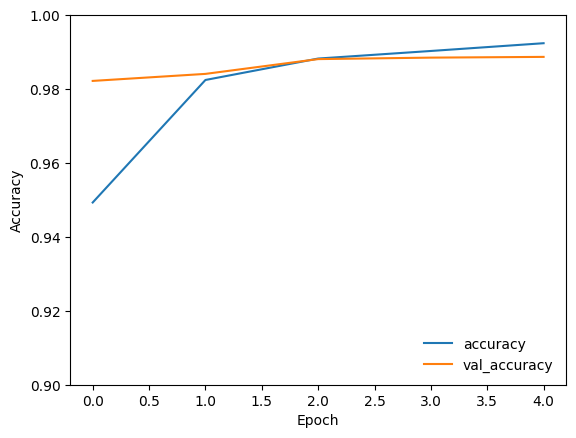

In [ ]:
# Plotting accuracy and validation accuracy to determine efficacy of multi convolutional layer neural network [1]
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.90, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)

The multi layer convolutional neural network has superior accuracy by approximately +0.4% yet reduced computational efficiency (shown by longer runtime) compared to the single convolutional layer neural network.

It also avoids overfitting seen via the reduced divergence at later epochs.